In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
from tqdm import tqdm

import seaborn as sns
import statsmodels.api as sm

import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.statespace.sarimax import SARIMAX

#from arch import arch_model

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

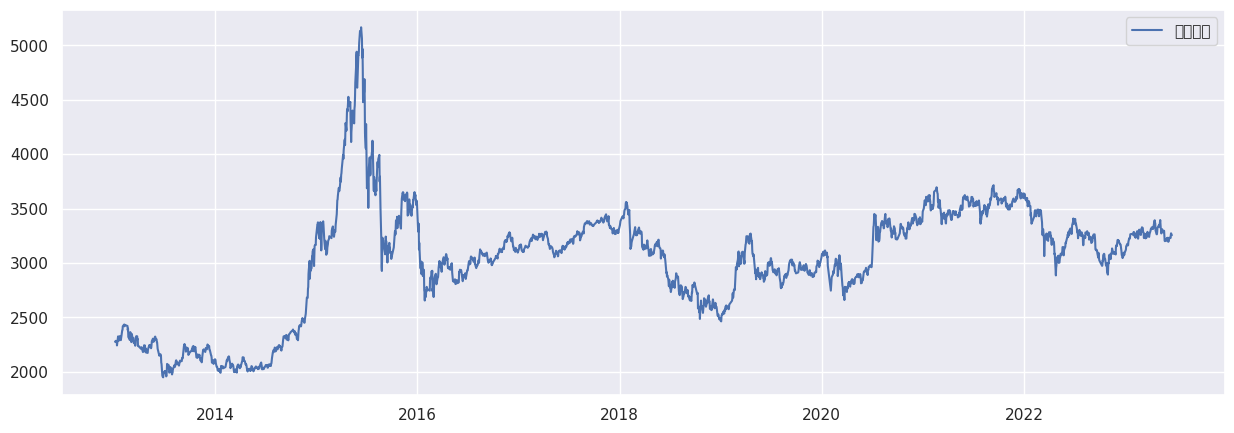

In [3]:
data = ak.stock_zh_index_daily(symbol='sh000001')
data.set_index('date',inplace=True)
data.index = pd.to_datetime(data.index)
data  = data[['close']]
data = data.loc['20130101':]
data['ret'] = data['close'].pct_change()*100
train_df = data.loc['20130101':'20201231']
test_df = data.loc['20210101':]

plt.rcParams["figure.figsize"] = 15, 5
plt.plot(data.loc['20130101':,'close'],label='上证指数')
plt.legend()

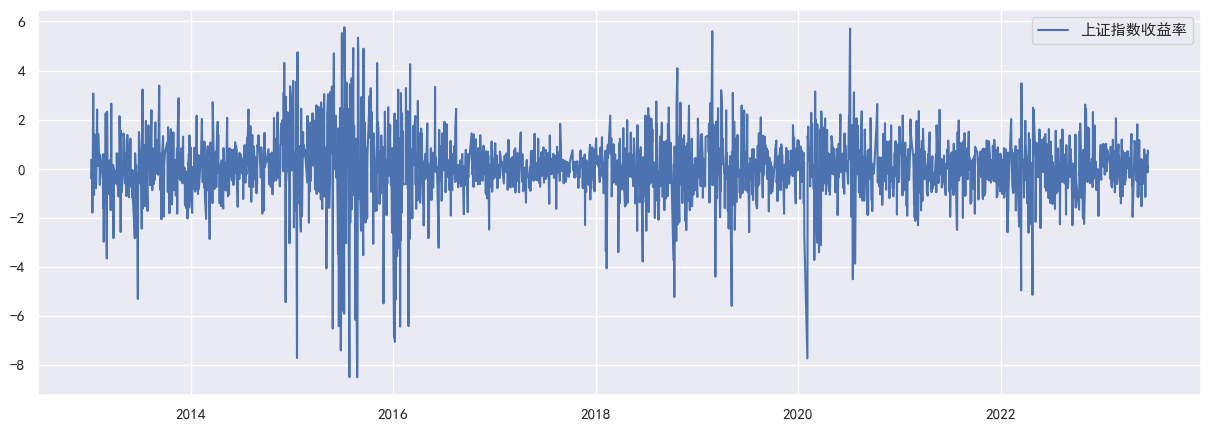

In [26]:
plt.rcParams["figure.figsize"] = 15, 5
plt.plot(data.ret,label='上证指数收益率')
plt.legend()

In [27]:
from statsmodels.tsa.stattools import adfuller
adfuller(data.ret.dropna())

(-9.963722246991855,
 2.3367704660891554e-17,
 25,
 2513,
 {'1%': -3.432954851668868,
  '5%': -2.862690812247962,
  '10%': -2.5673826214832887},
 8431.018064544909)

In [23]:
sm.tsa.arma_order_select_ic(train_df.ret, ic='aic', trend='n', max_ar=20,max_ma=5)

{'aic':               0            1            2            3            4  \
 0   6803.317493  6799.997542  6799.954381  6801.584495  6799.356782   
 1   6800.366644  6795.919022  6801.874518  6802.417614  6801.356400   
 2   6799.969127  6796.124228  6775.644340  6767.012703  6767.876788   
 3   6801.098354  6801.745742  6766.510073  6768.152292  6766.364187   
 4   6798.094457  6800.059157  6768.009361  6766.230269  6769.716950   
 5   6799.953771  6800.673955  6769.808357  6764.834181  6765.653661   
 6   6791.212307  6791.495550  6771.744041  6765.546001  6775.341300   
 7   6790.370518  6790.013680  6773.404049  6771.199380  6782.871458   
 8   6789.888604  6791.090896  6774.516512  6776.377923  6771.716882   
 9   6789.240559  6784.558190  6774.254701  6770.328197  6772.225104   
 10  6788.594116  6790.090729  6775.900853  6778.146529  6774.708652   
 11  6789.962345  6791.935418  6775.429148  6791.402529  6775.955617   
 12  6791.777614  6784.732926  6776.707693  6777.925833  

In [28]:
data.describe()

,close,ret
count,2540.000000,2539.000000
mean,3028.143231,0.022864
std,518.510665,1.303791
min,1950.013000,-8.490899
25%,2793.730250,-0.519841
50%,3108.685500,0.051015
75%,3337.914750,0.624538
max,5166.350000,5.763528


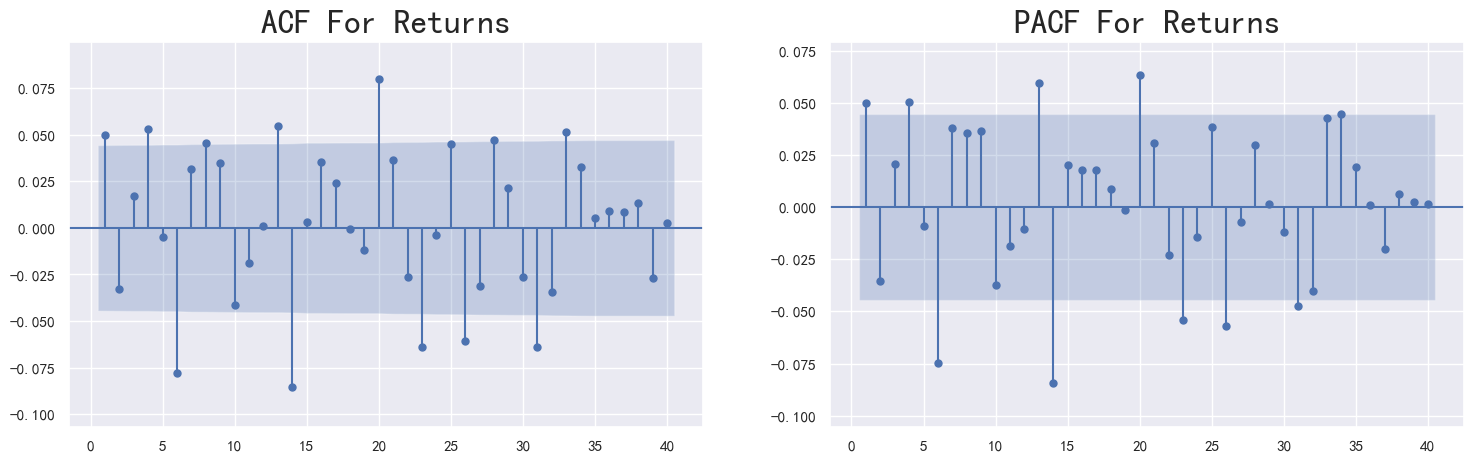

In [29]:
plt.rcParams["figure.figsize"] = 18, 5

fig, axes = plt.subplots(1, 2)

sgt.plot_acf(train_df.ret[1:], zero = False, lags = 40, ax = axes[0],auto_ylims=True)
sgt.plot_pacf(train_df.ret[1:], zero = False, lags = 40, ax = axes[1],auto_ylims=True)

axes[0].set_title("ACF For Returns", size = 24)
axes[1].set_title("PACF For Returns", size = 24)

plt.show()

In [30]:
model = SARIMAX(train_df.ret[1:], order = (15, 0, 3))
model_results = model.fit()
print(model_results.summary())

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                 1944
Model:              SARIMAX(15, 0, 3)   Log Likelihood               -3361.681
Date:                Sun, 18 Jun 2023   AIC                           6761.363
Time:                        16:25:11   BIC                           6867.240
Sample:                             0   HQIC                          6800.294
                               - 1944                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1102      0.144     -0.767      0.443      -0.392       0.171
ar.L2         -0.8359      0.052    -16.097      0.000      -0.938      -0.734
ar.L3         -0.4032      0.145     -2.788      0.0

In [31]:
arma_forecast = model_results.get_forecast(len(test_df.index))
arma_predictions_df = arma_forecast.conf_int(alpha = 0.05) # Confidence level of 95%
arma_predictions_df['Predictions'] = (arma_predictions_df['lower ret'] + arma_predictions_df['upper ret'])/2
arma_predictions_df.index = test_df.index

In [32]:
model_results.forecast().values

array([0.22220062])

In [33]:
arma_predictions_df

,lower ret,upper ret,Predictions
date,,,
2021-01-04,-2.457382,2.901783,2.222006e-01
2021-01-05,-2.894116,2.474800,-2.096577e-01
2021-01-06,-2.591544,2.778444,9.345019e-02
2021-01-07,-2.702675,2.668931,-1.687242e-02
2021-01-08,-2.461766,2.913116,2.256751e-01
...,...,...,...
2023-06-12,-2.733954,2.733954,9.015011e-13
2023-06-13,-2.733954,2.733954,6.252776e-13
2023-06-14,-2.733954,2.733954,-6.261658e-13


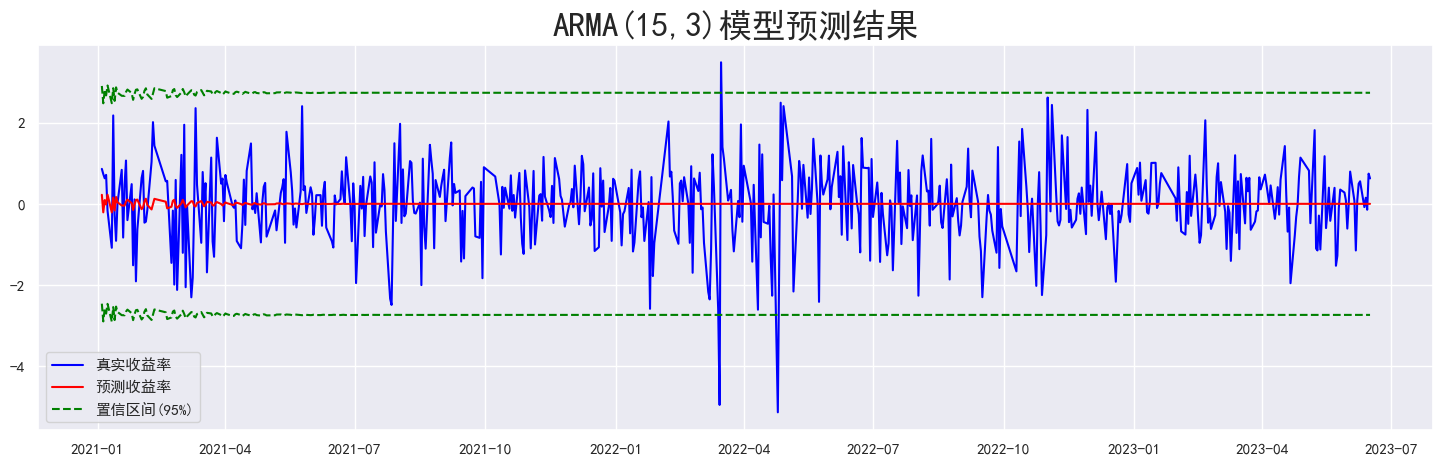

In [37]:
arma_mse = mean_squared_error(test_df["ret"].values, arma_predictions_df["Predictions"])

plt.rcParams["figure.figsize"] = 18, 5

plt.plot(test_df.ret, color = "blue", label = "真实收益率")

plt.plot(arma_predictions_df["Predictions"], color = "red", label = "预测收益率")
plt.plot(arma_predictions_df["upper ret"], color = "green", linestyle = "--", label = "置信区间(95%)")
plt.plot(arma_predictions_df["lower ret"], color = "green", linestyle = "--")

plt.title("ARMA(15,3)模型预测结果", size = 24)

plt.legend()

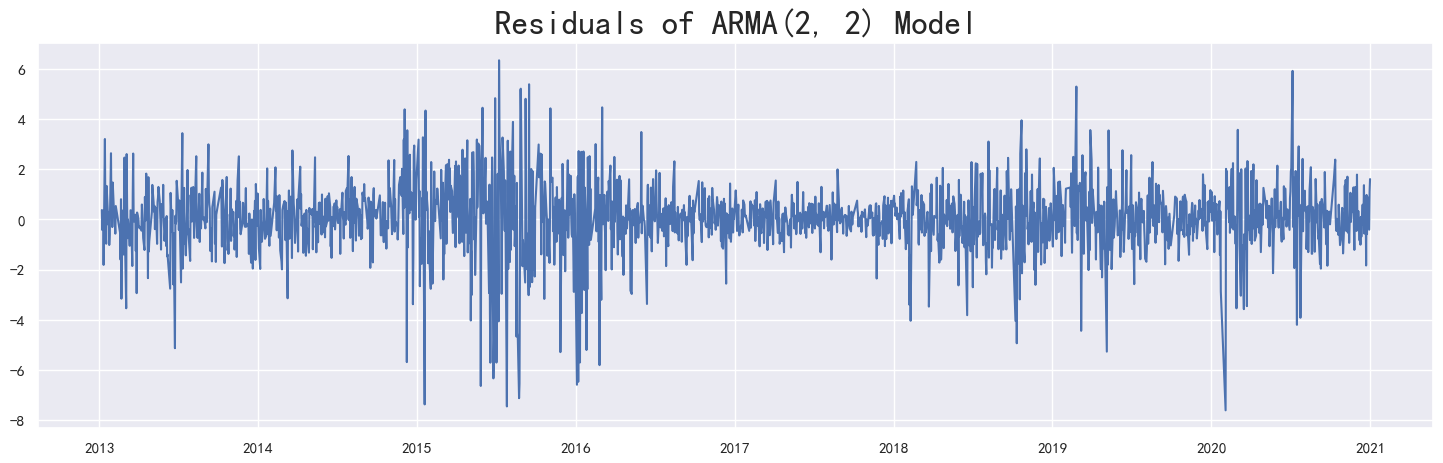

In [35]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(model_results.resid)
plt.title("Residuals of ARMA(2, 2) Model", size = 24)

plt.show()

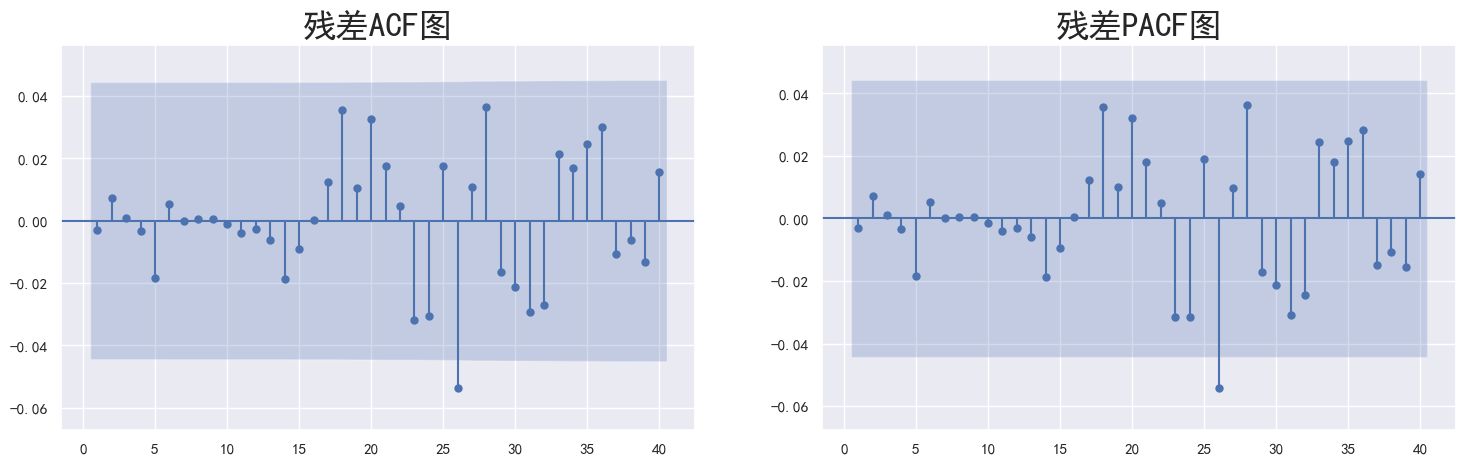

In [38]:
plt.rcParams["figure.figsize"] = 18, 5

fig, axes = plt.subplots(1, 2)

sgt.plot_acf(model_results.resid, zero = False, lags = 40, ax = axes[0],auto_ylims=True)
sgt.plot_pacf(model_results.resid, zero = False, lags = 40, ax = axes[1],auto_ylims=True)

axes[0].set_title("残差ACF图", size = 24)
axes[1].set_title("残差PACF图", size = 24)

plt.show()

In [42]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(model_results.resid, lags=[6,12,24,40], return_df=True)

,lb_stat,lb_pvalue
6,0.862616,0.990289
12,0.914572,0.999991
24,11.381602,0.986020
40,30.704825,0.854656


In [43]:
from sklearn import metrics

In [47]:
print(metrics.mean_squared_error(test_df["ret"].values, arma_predictions_df["Predictions"]))
print(metrics.mean_squared_error(test_df["ret"].values, arma_predictions_df["Predictions"])**0.5)
print(metrics.mean_absolute_error(test_df["ret"].values, arma_predictions_df["Predictions"]))
print(metrics.mean_absolute_percentage_error(test_df["ret"].values, arma_predictions_df["Predictions"]))

0.9277631639177646
0.9632046324212548
0.7163370924557408
1.0527943001718587
